# COGS 108 - Final Project
# Physical Fitness and Academic Performance 

Video Link: https://www.youtube.com/watch?v=eiIFw2HPthg 

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [ X ] NO - keep private

# Overview




In this project, we explored the possible relationships between GPA and physical fitness. We carried out our analysis through linear regression models in order to measure the correlation between each feature and GPA. Our findings suggest that there is little to no correlation between excercise intensity and GPA. The other factors failed to show a linear relationship with GPA.




# Names

- Aditya Moghe
- Raghav Cherukuru
- Presley Cheng
- Salwan Shathar
- Eric Peng

<a id='research_question'></a>
# Research Question

What is the relationship between excerise and academic performance (Grade point average) amongst undergraduate students in the United States as measured through physical fitness factors such as mile time, steps taken daily, cardio, and excercise intensity?


<a id='background'></a>

## Background & Prior Work

Academic performance is a critical factor towards a person's overall academic success. Maximizing ones academic success could better one's carreer and state of life with the opportunities schooling provides. Our group is highly interested in exercising and physical fitness; as college students looking to excel in our academic studies, we want to examine the effects of exercising on academic performance.

There have been extensive studies on the correlation between physical activity and academic performance amongst adolescents. One such study [^Castelli] found that physical activity is linked to higher academic performance as measured through standardized test scores, improved memory retention, and better engagement. The children studied had an enhanced learning experience when participating in physical activities. While this study was able to effectively correlate academics with exercise rates, the results were not applicable to college students. Our group aims to extend the findings to college student population.

A 2017 study from the Stanford Center for Education Policy Analysis[^Fricke] concluded that college students who were able to effectively integrate both excercise and studying into their daily regimen, showed far greater academic results than students who did not. However one confounding variable in the conducting of the study was that the researchers used incentives to encourage students to participate in the on campus activities. The findings were not able to distinguish whether it was excercise or spending more time at the educational facility that yielded in higher academic performance. Our group aims to refine this study and truly pinpoint whether there is a direct correlation to exercise rates and higher academic performance among college students.



[^Castelli]: Castelli, M., Darla, (2015). Active Education: Growing Evidence on Physical Activity and Academic Performance. https://activelivingresearch.org/sites/activelivingresearch.org/files/ALR_Brief_ActiveEducation_Jan2015.pdf

[^Fricke]: Fricke, H., Lechner, M., & Steinmayr, A. (2017). The Effect of Physical Activity on Student Performance in College: An Experimental Evaluation. https://cepa.stanford.edu/content/effect-physical-activity-student-performance-college-experimental-evaluation



# Hypothesis


We predict that college going students who are more physically fit will perform at higher rates in academics than college students who are less physically fit. This hypothesis relies on the idea that physical activity can improve cognitive health — helping you think, learn, and problem-solve. Therefore, we hypothesize that being more physically fit will yield higher GPA.


# Dataset(s)


#####Dataset
- Dataset Name: FitbitsAndGradesData (Freshman)
- Variable used:  fr_DF
- Link to the dataset: https://figshare.com/articles/dataset/Dataset_Fitbits_field-tests_and_grades_The_effects_of_a_healthy_and_physically_active_lifestyle_on_the_academic_performance_of_first_year_college_students_/7218497
- Number of observations: 581 observations

Description: This dataset (strictly freshman) makes use of fitbit technology to monitor fitness levels of study participants based on a 1-mile field assessment and a lifestyle assesment survey. The data additionaly includes Grade Point Average (GPA) measurements for each participant for the semester they were monitored in. The features in this dataset are as follow:

- Steps
- Peak
- Cardio
- FatBurn
- Mode 
- Minutes
- Gender
- Age 
- GPA
- LifeScore


<!-- (Dataset 2:)
- Dataset Name: HealthBehavAcadPerfAffect 
- Variable used: hbap_DF
- Link to the dataset: https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/27388/SPWIGT&version=2.0
- Number of observations:  2111

Description: This dataset (college attending students) observes the relationship between health and physical activities with academic performance. The study tracks each participant response for approximately one month in order to quanitfy change in academic performance per person.



Combining the Datasets: After revisiting both datasets, we realized that the fitness and academic performance metrics were different between the datasets. In dataset 1, the mile time and GPA is measured, whereas in dataset 2, the physical activity time (in minutes) and the passing/failing of a standardized test is measured.  -->

# Setup

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing

#Dataset
fr_DF = pd.read_csv('https://raw.githubusercontent.com/presley-cheng/COGS108_070_DataSets/main/FitbitsAndGradesData_Fall2017.csv')

display(fr_DF.head()) 
display(fr_DF.shape) #(observations, features)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Key,Steps,Peak,Cardio,FatBurn,Mode,Minutes,Gender,Age,GPA,Life Score
0,1,11157,0.13,3.86,111.92,1,9.35,1,23,4.00,48
1,2,7986,2.72,15.53,249.29,1,8.20,1,18,3.26,101
2,3,11602,0.35,2.10,195.32,0,12.73,0,18,3.07,64
3,4,10609,1.00,6.51,121.75,1,10.00,1,17,4.00,41
4,5,14552,9.10,6.09,109.66,1,8.63,0,18,2.87,83


(581, 11)

# Data Cleaning

Describe your data cleaning steps here.

In [ ]:
# Change gender from 0,1 -> M,F (Ease of reading)

fr_DF['Gender'] = fr_DF['Gender'].replace([0, 1], ['M', 'F'])

fr_DF.head()

,Key,Steps,Peak,Cardio,FatBurn,Mode,Minutes,Gender,Age,GPA,Life Score
0,1,11157,0.13,3.86,111.92,1,9.35,F,23,4.00,48
1,2,7986,2.72,15.53,249.29,1,8.20,F,18,3.26,101
2,3,11602,0.35,2.10,195.32,0,12.73,M,18,3.07,64
3,4,10609,1.00,6.51,121.75,1,10.00,F,17,4.00,41
4,5,14552,9.10,6.09,109.66,1,8.63,M,18,2.87,83


In [ ]:
# Remove columns -> No use towards our study 

fr_DF.drop('Mode', axis=1, inplace=True)
fr_DF.drop('Peak', axis=1, inplace=True)
fr_DF.drop('Life Score', axis=1, inplace=True)
display(fr_DF)

,Key,Steps,Cardio,FatBurn,Minutes,Gender,Age,GPA
0,1,11157,3.86,111.92,9.35,F,23,4.00
1,2,7986,15.53,249.29,8.20,F,18,3.26
2,3,11602,2.10,195.32,12.73,M,18,3.07
3,4,10609,6.51,121.75,10.00,F,17,4.00
4,5,14552,6.09,109.66,8.63,M,18,2.87
...,...,...,...,...,...,...,...,...
576,577,10445,11.02,194.46,8.53,F,18,3.73
577,578,13537,1.54,87.39,6.55,M,18,3.93
578,579,7653,2.64,68.24,7.63,M,18,2.92
579,580,13828,8.00,189.69,8.25,F,18,3.94


We have thoroughly cleaned our FitbitsAndGradesData dataset for our study!


# Data Analysis & Results

### Descriptive Analysis

In [ ]:
# determine the shape of the data

shape = fr_DF.shape
display(shape)


(581, 8)

After finding the shape of the FitbitsAndGradesData dataset, we can note that there exist:
- 581 observations (rows)
- 10 features (columns)

In [ ]:
# get descriptive statistics for quantitative variables

description = fr_DF.describe()
display(description)

,Key,Steps,Cardio,FatBurn,Minutes,Age,GPA
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000
mean,291.000000,10229.024096,9.007694,148.726454,10.161015,18.619621,3.186919
std,167.864529,3067.141829,16.465780,96.495032,3.139881,1.673802,0.757748
min,1.000000,0.000000,0.000000,0.000000,5.380000,16.000000,0.000000
25%,146.000000,8506.000000,2.340000,82.430000,7.670000,18.000000,2.840000
50%,291.000000,10284.000000,4.600000,122.000000,9.350000,18.000000,3.350000
75%,436.000000,12082.000000,8.950000,189.690000,12.150000,19.000000,3.780000
max,581.000000,20331.000000,180.650000,729.670000,21.070000,40.000000,4.000000


After analyzing the descriptive statistics for FitbitsAndGradesData dataset we noted the following:

- Mean GPA = 3.187
- Median GPA = 3.35
- Standard Deviation GPA = 0.757

From the above statistics, we get some feel for the features of our data.

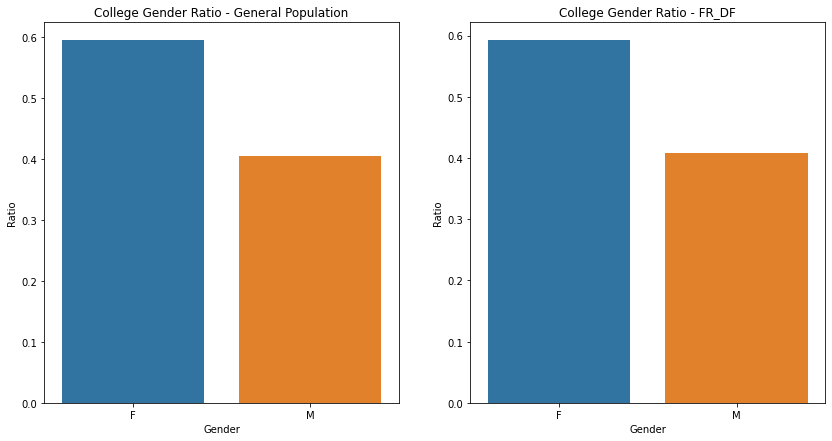

F    344
M    237
Name: Gender, dtype: int64

In [ ]:
# Let's take a look at how gender is broken down, in order to make sure our sample is representative

fig, axs = plt.subplots(1,2, figsize=(14, 7))

gender_counts = fr_DF['Gender'].value_counts()  # Male and female counts

#General Population
gen_temp = pd.DataFrame({'Gender': ['F', 'M'], 'Ratio': [0.595, 0.405]})  
pop_ratio = sns.barplot(x = 'Gender', y = 'Ratio', ax=axs[0], data = gen_temp).set_title('College Gender Ratio - General Population')

ratio_male = gender_counts[1] / gender_counts.sum()   # male ratio
ratio_female = gender_counts[0] / gender_counts.sum() # female ratio

#FR_DF Population
ratio_gendergraph = sns.barplot(x = ['F', 'M'], y = [ratio_female, ratio_male], ax=axs[1]).set_title('College Gender Ratio - FR_DF')
plt.xlabel("Gender")
plt.ylabel("Ratio")

plt.show()

display(gender_counts)



Here we see the distribution of Gender over our sample dataset. We notice that our sample is 0.68 males for each female. Generally we notice that the ratio in an average US college  is 0.66 males for each female (40% male to 60% female). Therefore we can conclude that our sample is representative of our overall population in study. The ratio for general population statistics can be found from the following source:
- https://collegenews.org/women-outnumber-men-in-us-colleges-nearly-60-of-students-in-2020-21-were-women/#:~:text=Data%20show%20that%2059.5%20percent,men%20decreasing%20by%2071%20percent





In [ ]:
# lets look at how gender breaks down our statistics

description_male = fr_DF.loc[fr_DF['Gender'] == 'M'].describe()
description_female = fr_DF.loc[fr_DF['Gender'] == 'F'].describe()

display("Male Statistics")
display(description_male)

display("Female Statistics")
display(description_female)

'Male Statistics'

,Key,Steps,Cardio,FatBurn,Minutes,Age,GPA
count,237.000000,237.000000,237.00000,237.000000,237.000000,237.000000,237.000000
mean,282.527426,10424.932489,8.30827,122.155738,8.585907,18.852321,3.054304
std,166.649651,3370.917550,15.68713,75.110210,2.877209,2.312302,0.720178
min,3.000000,9.000000,0.00000,0.010000,5.380000,16.000000,0.600000
25%,138.000000,8399.000000,1.83000,69.840000,6.850000,18.000000,2.680000
50%,282.000000,10455.000000,3.34000,104.090000,7.630000,18.000000,3.210000
75%,425.000000,12497.000000,6.57000,169.650000,9.120000,19.000000,3.620000
max,581.000000,20331.000000,134.20000,439.580000,21.070000,40.000000,4.000000


'Female Statistics'

,Key,Steps,Cardio,FatBurn,Minutes,Age,GPA
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,296.837209,10094.052326,9.489564,167.032442,11.246192,18.459302,3.278285
std,168.690540,2836.259017,16.987269,105.068967,2.842495,0.997709,0.770413
min,1.000000,0.000000,0.000000,0.000000,5.580000,16.000000,0.000000
25%,156.750000,8770.750000,3.097500,98.270000,8.910000,18.000000,2.920000
50%,305.500000,10187.000000,5.780000,136.620000,10.795000,18.000000,3.500000
75%,444.250000,11790.000000,9.852500,214.147500,13.205000,19.000000,3.820000
max,580.000000,18673.000000,180.650000,729.670000,19.100000,25.000000,4.000000


After analyzing the breakdown of statistics by gender, we found that the mean and median GPA amongst females was higher than the mean and median GPA's of males. Furthermore, on average, we can see that males and females both walked roughly the same amount of steps. When observing the cardio feature of both genders, we can note that the mean cardio for females is higher than that for males by roughly one unit. In addition, males have a lower fat burn than females in this study. Lastly we notice on average, males have a faster mile time than females. These individual statistics must be taken into account in order to answer our research question. Let's take a look at the distributions of each feature.


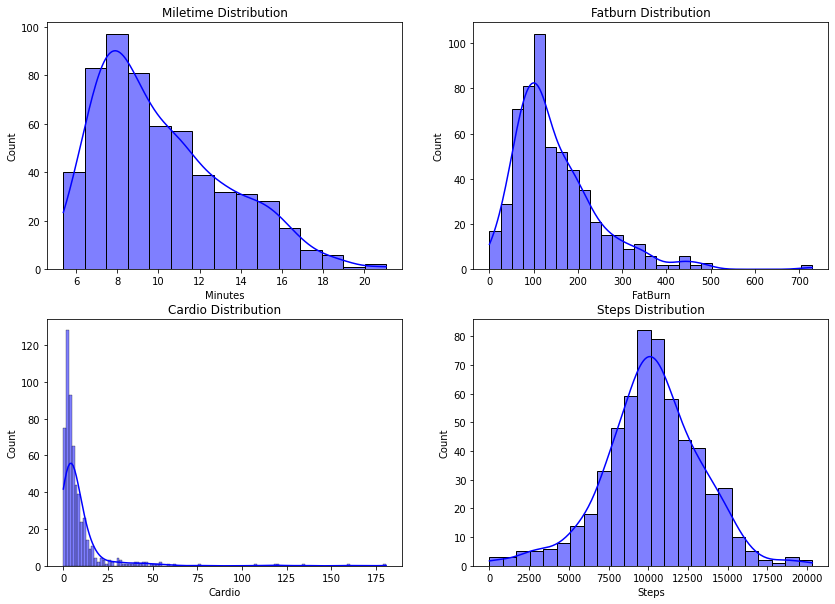

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(14, 10))

#Let's plot the distributions
minutes_histplot = sns.histplot(data=fr_DF, x="Minutes", kde=True, color="blue", ax = axs[0][0]).set_title('Miletime Distribution')
fatburn_histplot = sns.histplot(data=fr_DF, x="FatBurn", kde=True, color="blue", ax = axs[0][1]).set_title('Fatburn Distribution')
cardio_histplot = sns.histplot(data=fr_DF, x="Cardio", kde=True, color="blue", ax = axs[1][0]).set_title('Cardio Distribution')
steps_histplot = sns.histplot(data=fr_DF, x="Steps", kde=True, color="blue", ax = axs[1][1]).set_title('Steps Distribution')

plt.show()

We will apply a log10-transformation to the cardio feature with an offset of 0.1. This will shift the values away from being centered near zero when put on the log scale. This process is done in order to normally distribute the right skewed data.

In [ ]:
# log transform with a 0.1 offset

fr_DF['Cardio_log10'] = np.log10(fr_DF['Cardio'] + 0.1)

We can take a look at the feature's boxplots in order to identify any outliers that we must take into account.

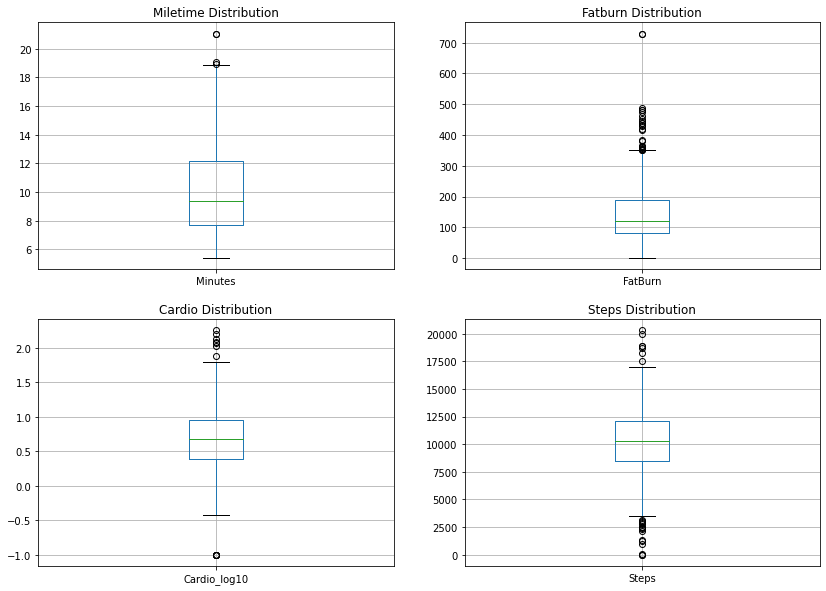

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(14, 10))

fr_DF.boxplot(column=['Minutes'], ax = axs[0][0]).set_title('Miletime Distribution')
fr_DF.boxplot(column=['FatBurn'],ax = axs[0][1]).set_title('Fatburn Distribution')
fr_DF.boxplot(column=['Cardio_log10'], ax = axs[1][0]).set_title('Cardio Distribution')
fr_DF.boxplot(column=['Steps'], ax = axs[1][1]).set_title('Steps Distribution')

plt.show()

The boxplots above reflect the distributions of our features. In addition to this, we can clearly see a visualization for the amount of ouliers of each feature. In order to confidently answer the research question at hand, we must take into consideration outliers. 

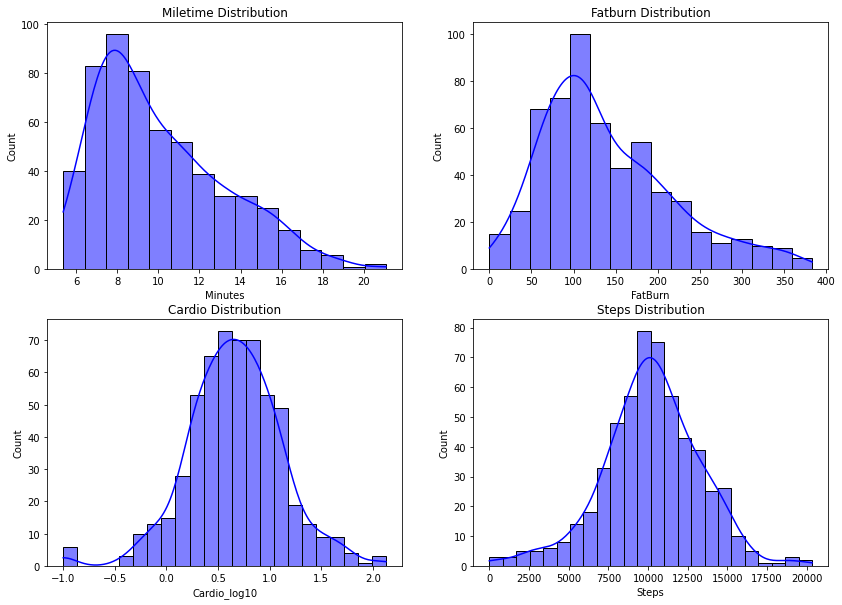

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(14, 10))

fr_DF = fr_DF.loc[fr_DF['FatBurn'] < 400] # Let's elimate outliers in FatBurn

#Let's plot the distributions
minutes_histplot = sns.histplot(data=fr_DF, x="Minutes", kde=True, color="blue", ax = axs[0][0]).set_title('Miletime Distribution')   #this will stay the same
fatburn_histplot = sns.histplot(data=fr_DF, x="FatBurn", kde=True, color="blue", ax = axs[0][1]).set_title('Fatburn Distribution')    #we will plot after eliminating outliers
cardio_histplot = sns.histplot(data=fr_DF, x="Cardio_log10", kde=True, color="blue", ax = axs[1][0]).set_title('Cardio Distribution') #we will plot after applying log transform + offset
steps_histplot = sns.histplot(data=fr_DF, x="Steps", kde=True, color="blue", ax = axs[1][1]).set_title('Steps Distribution')          #this will stay the same

plt.show()


The miletime distribution will be skewd to the right because of the cuttoff on the left since it is not realistic to run a mile within 3 minutes for the average population. We can also see that the Cardio, Steps, and Fatburn appear to be normally distributed or near normally distributed. 

Now that we have analyzed the distribution of each feature, we can begin with our Exploratory Analysis. 

### Exploratory Analysis

#### Individual Variable Analysis on Overall Population

In order to visually see the relationship between GPA and each feature, we will create Scatter plots. Furthermore, we will also show histplots to enhance the visualization for the clusters.

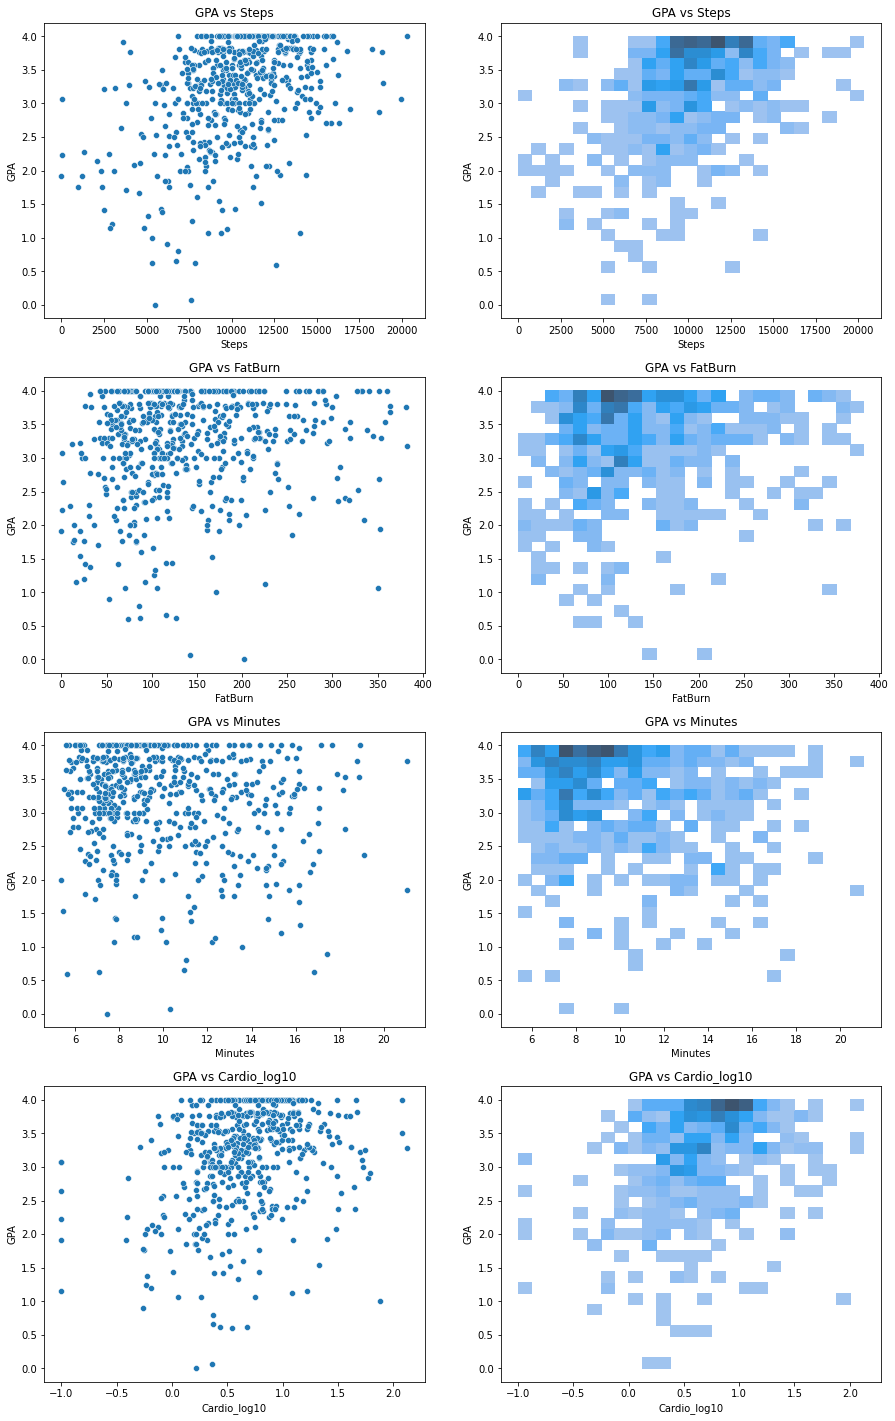

In [ ]:
fig, axs = plt.subplots(4,2, figsize=(15, 25))

# GPA vs Steps
steps_gpa = sns.scatterplot(data = fr_DF, x = 'Steps', y = 'GPA', ax=axs[0][0]).set_title('GPA vs Steps')
hist_steps = sns.histplot(data = fr_DF, y = 'GPA', x = 'Steps',  bins = 25, ax=axs[0][1]).set_title('GPA vs Steps')

# GPA vs FatBurn
fatBurn_gpa = sns.scatterplot(data = fr_DF, x = 'FatBurn', y = 'GPA', ax=axs[1][0]).set_title('GPA vs FatBurn')
hist_fatBurn = sns.histplot(data = fr_DF, y = 'GPA', x = 'FatBurn',  bins = 25, ax=axs[1][1]).set_title('GPA vs FatBurn')

# GPA vs Minutes
minutes_gpa = sns.scatterplot(data = fr_DF, x = 'Minutes', y = 'GPA', ax=axs[2][0]).set_title('GPA vs Minutes')
hist_minutes = sns.histplot(data = fr_DF, y = 'GPA', x = 'Minutes',  bins = 25, ax=axs[2][1]).set_title('GPA vs Minutes')

# GPA vs Cardio
cardiolog_gpa = sns.scatterplot(data = fr_DF, x = 'Cardio_log10', y = 'GPA', ax=axs[3][0]).set_title('GPA vs Cardio_log10')
hist_cardiolog = sns.histplot(data = fr_DF, y = 'GPA', x = 'Cardio_log10',  bins = 25, ax=axs[3][1]).set_title('GPA vs Cardio_log10')

From the scatterplots and the histplots above, we see that there is a possible linear correlation between each feature and the GPA. This will allow us to perform linear regression on each feature. However, we need to make sure that gender does not interfere with our analysis.

#### Variables Broken by Gender

Let us break down the relationship between each feature and GPA by gender. Let us see if a similar pattern occurs between the male and female gender groups.







In [ ]:
# Split fr_DF dataframe by gender

males_DF = fr_DF.loc[fr_DF['Gender'] == 'M'] 
females_DF = fr_DF.loc[fr_DF['Gender'] == 'F']

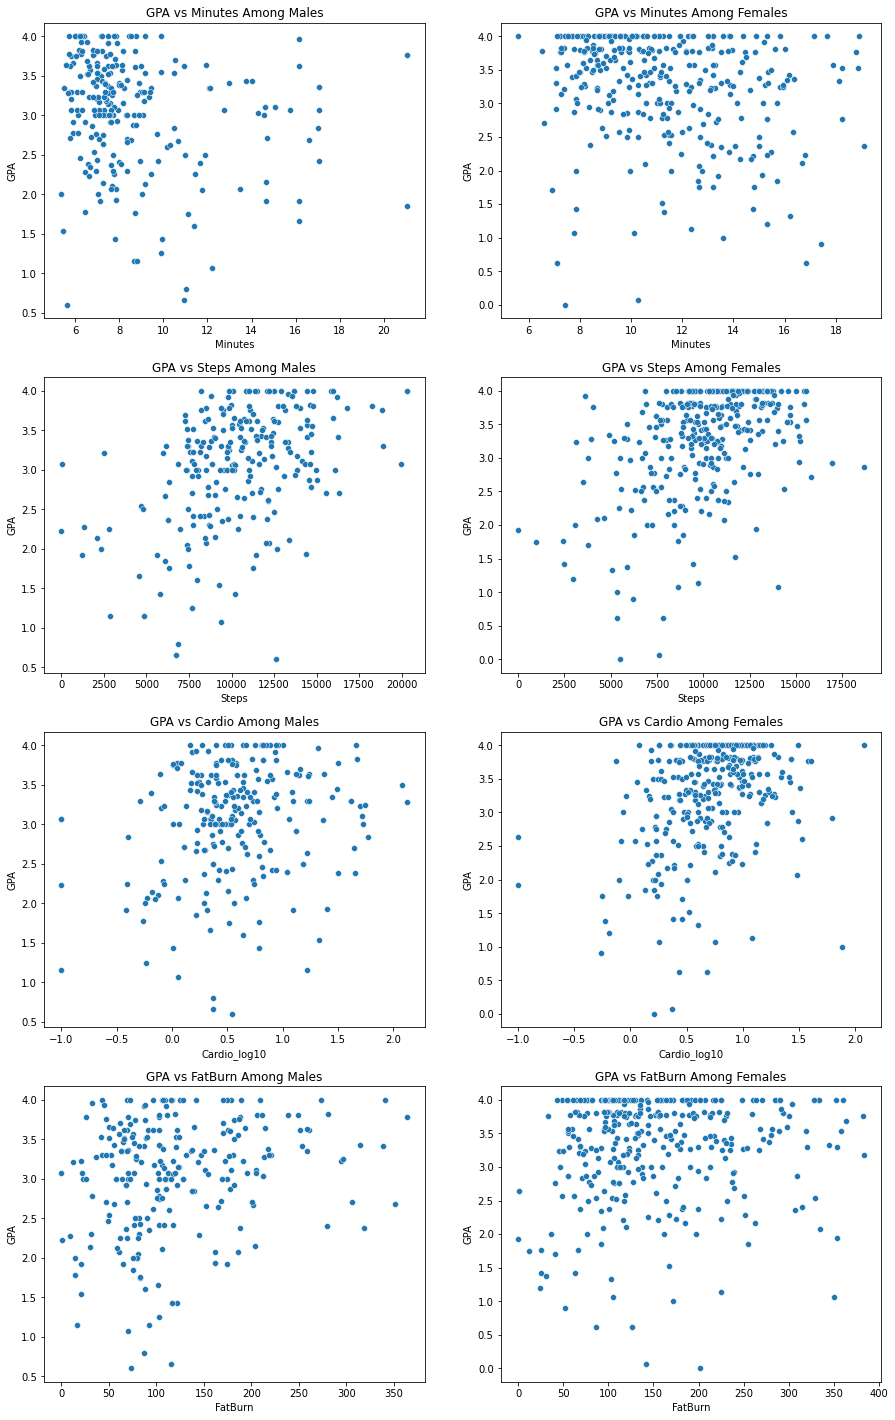

In [ ]:

fig, axs = plt.subplots(4,2, figsize=(15, 25))

# Effect of mile time on GPA, broken down by gender
minutes_male_gpa = sns.scatterplot(data=males_DF, x="Minutes",  y = 'GPA', ax=axs[0][0],).set_title('GPA vs Minutes Among Males')
minutes_female_gpa = sns.scatterplot(data=females_DF, x="Minutes",  y = 'GPA', ax=axs[0][1],).set_title('GPA vs Minutes Among Females')

# Effect of steps on GPA, broken down by gender
steps_male_gpa = sns.scatterplot(data=males_DF, x="Steps",  y = 'GPA', ax=axs[1][0],).set_title('GPA vs Steps Among Males')
steps_female_gpa = sns.scatterplot(data=females_DF, x="Steps",  y = 'GPA',  ax=axs[1][1],).set_title('GPA vs Steps Among Females')

# Effect of cardio_log10 on GPA, broken down by gender
cardio_male_gpa = sns.scatterplot(data=males_DF, x="Cardio_log10",  y = 'GPA', ax=axs[2][0],).set_title('GPA vs Cardio Among Males')
cardio_female_gpa = sns.scatterplot(data=females_DF, x="Cardio_log10",  y = 'GPA', ax=axs[2][1],).set_title('GPA vs Cardio Among Females')

# Effect of FatBurn on GPA, broken down by gender
fatburn_male_gpa = sns.scatterplot(data=males_DF, x="FatBurn",  y = 'GPA',  ax=axs[3][0]).set_title('GPA vs FatBurn Among Males')
fatburn_female_gpa = sns.scatterplot(data=females_DF, x="FatBurn",  y = 'GPA', ax=axs[3][1]).set_title('GPA vs FatBurn Among Females')



plt.show()

Looking at each scatterplot broken down by gender, we observe that the relationship between GPA and each feature is similar between both males and females. This suggests that gender does not influence the relationship between GPA and each feature. 

We have cleaned our data, checked the distributions for each feature and transformed them respectively, eliminated outliers from our feature columns, and made sure that gender *does not* interfere with our analysis. We now have an understanding of our data and can proceed with linear regression.



#### Linear Regression Models


Since we will be performing linear regression, which is a gradient descent based algorithm, we will need to scale the features in order to standardize the range. 

In [ ]:
# Standardize the features

X = fr_DF[['Minutes','Cardio_log10','FatBurn','Steps']] #Predictor Features
Y = fr_DF['GPA']  #Outcome Feature

scaler = preprocessing.StandardScaler().fit(X) 
X_scaled = scaler.transform(X)  

scaled_df = pd.DataFrame(X_scaled, columns = ['Minutes','Cardio_log10','FatBurn','Steps'])
scaled_df['GPA'] = Y
scaled_df.head()

,Minutes,Cardio_log10,FatBurn,Steps,GPA
0,-0.240761,-0.138759,-0.354395,0.312533,4.00
1,-0.607827,1.167450,1.395542,-0.718707,3.26
2,0.838094,-0.697974,0.708026,0.457251,3.07
3,-0.033289,0.348676,-0.229172,0.134318,4.00
4,-0.470577,0.286218,-0.383185,1.416619,2.87


The above dataframe shows us the standardized features after we scale the original model. We can now begin performing linear regression on the combinations of these features to observe the P-Values and coefficients. This analysis allows us to see how well the features act as predictors for determining the GPA. Since we have 4 distinct features: Minutes, Steps, FatBurn, Cardio_log10, we will have a total of 15 feature combinations.

In [ ]:
results = []    #Stores the Linear Regression models of all 15 combinations of the 4 features

# GPA - Minutes Model
model_M = smf.ols(formula='GPA ~ Minutes', data=scaled_df)
results.append(model_M.fit())

# GPA - Cardio_log10 Model
model_C = smf.ols(formula='GPA ~ Cardio_log10', data=scaled_df)
results.append(model_C.fit())

# GPA - FatBurn Model
model_F = smf.ols(formula='GPA ~ FatBurn', data=scaled_df)
results.append(model_F.fit())

# GPA - Steps Model
model_S = smf.ols(formula='GPA ~ Steps', data=scaled_df)
results.append(model_S.fit())

# GPA - Steps + Cardio_log10 Model
model_SC = smf.ols(formula='GPA ~ Steps + Cardio_log10', data=scaled_df)
results.append(model_SC.fit())

# GPA - Steps + Minutes Model
model_SM = smf.ols(formula='GPA ~ Steps + Minutes', data=scaled_df)
results.append(model_SM.fit())

# GPA - Steps + FatBurn Model
model_SF = smf.ols(formula='GPA ~ Steps + FatBurn', data=scaled_df)
results.append(model_SF.fit())

# GPA - FatBurn + Cardio_log10 Model
model_FC = smf.ols(formula='GPA ~ FatBurn + Cardio_log10', data=scaled_df)
results.append(model_FC.fit())

# GPA - FatBurn + Minutes Model
model_FM = smf.ols(formula='GPA ~ FatBurn + Minutes', data=scaled_df)
results.append(model_FM.fit())

# GPA - Minutes + Cardio_log10 Model
model_MC = smf.ols(formula='GPA ~ Minutes + Cardio_log10', data=scaled_df)
results.append(model_MC.fit())

# GPA - Minutes + Cardio_log10 + FatBurn Model
model_MCF = smf.ols(formula='GPA ~ Minutes + Cardio_log10 + FatBurn', data=scaled_df)
results.append(model_MCF.fit())

# GPA - Minutes + Cardio_log10 + Steps Model
model_MCS = smf.ols(formula='GPA ~ Minutes + Cardio_log10 + Steps', data=scaled_df)
results.append(model_MCS.fit())

# GPA - Minutes + FatBurn + Steps Model
model_MFS = smf.ols(formula='GPA ~ Minutes + FatBurn + Steps', data=scaled_df)
results.append(model_MFS.fit())

# GPA - Cardio_log10 + FatBurn + Steps Model
model_CFS = smf.ols(formula='GPA ~ Cardio_log10 + FatBurn + Steps', data=scaled_df)
results.append(model_CFS.fit())

# GPA - Minutes + Cardio_log10 + Steps Model
model_MCFS = smf.ols(formula='GPA ~ Minutes + Cardio_log10 + FatBurn + Steps', data=scaled_df)
results.append(model_MCFS.fit())

##### P-Values and Coefficients

Now that we have the linear regression models made and fitted, we can observe the P-values and coefficients of each feature combination model. The P-value will express the statistical significance of our data. The threshold for the statistical significance will be 0.05. 

- If P-Value > 0.05 : The predictor is not significant
- If P-Value < 0.05 : The predictor is significant, and its correlation relies on the coefficient

In [ ]:
# Minutes
print('P-values:\n', results[0].pvalues[1:].to_string())
print('\nCoef:\n', results[0].params[1:].to_string())

P-values:
 Minutes    0.967659

Coef:
 Minutes    0.001315


In [ ]:
# Cardio_log10
print('P-values:\n', results[1].pvalues[1:].to_string())
print('\nCoef:\n', results[1].params[1:].to_string())

P-values:
 Cardio_log10    0.598942

Coef:
 Cardio_log10    0.017292


In [ ]:
# FatBurn
print('P-values:\n',results[2].pvalues[1:].to_string())
print('\nCoef:\n',results[2].params[1:].to_string())

P-values:
 FatBurn    0.027838

Coef:
 FatBurn    0.071652


In [ ]:
# Steps
print('P-values:\n',results[3].pvalues[1:].to_string())
print('\nCoef:\n',results[3].params[1:].to_string())

P-values:
 Steps    0.415254

Coef:
 Steps    0.02654


In [ ]:
# Steps + Cardio_log10
print('P-values:\n',results[4].pvalues[1:].to_string())
print('\nCoef:\n',results[4].params[1:].to_string())

P-values:
 Steps           0.502213
Cardio_log10    0.800516

Coef:
 Steps           0.023406
Cardio_log10    0.008893


In [ ]:
# Steps + Minutes
print('P-values:\n',results[5].pvalues[1:].to_string())
print('\nCoef:\n',results[5].params[1:].to_string())

P-values:
 Steps      0.389860
Minutes    0.779311

Coef:
 Steps      0.029210
Minutes    0.009473


In [ ]:
# Steps + FatBurn
print('P-values:\n',results[6].pvalues[1:].to_string())
print('\nCoef:\n',results[6].params[1:].to_string())

P-values:
 Steps      0.82778
FatBurn    0.04009

Coef:
 Steps      0.007350
FatBurn    0.069619


In [ ]:
# FatBurn + Cardio_log10
print('P-values:\n',results[7].pvalues[1:].to_string())
print('\nCoef:\n',results[7].params[1:].to_string())

P-values:
 FatBurn         0.028486
Cardio_log10    0.620457

Coef:
 FatBurn         0.079575
Cardio_log10   -0.018082


In [ ]:
# FatBurn + Minutes
print('P-values:\n',results[8].pvalues[1:].to_string())
print('\nCoef:\n',results[8].params[1:].to_string())

P-values:
 FatBurn    0.026091
Minutes    0.726505

Coef:
 FatBurn    0.073673
Minutes   -0.011484


In [ ]:
# Minutes + Cardio_log10
print('P-values:\n',results[9].pvalues[1:].to_string())
print('\nCoef:\n',results[9].params[1:].to_string())

P-values:
 Minutes         0.937045
Cardio_log10    0.596251

Coef:
 Minutes         0.002571
Cardio_log10    0.017482


In [ ]:
# Minutes + Cardio_log10 + FatBurn
print('P-values:\n',results[10].pvalues[1:].to_string())
print('\nCoef:\n',results[10].params[1:].to_string())

P-values:
 Minutes         0.659992
Cardio_log10    0.573907
FatBurn         0.025688

Coef:
 Minutes        -0.014665
Cardio_log10   -0.020850
FatBurn         0.083369


In [ ]:
# Minutes + Cardio_log10 + Steps
print('P-values:\n',results[11].pvalues[1:].to_string())
print('\nCoef:\n',results[11].params[1:].to_string())

P-values:
 Minutes         0.785229
Cardio_log10    0.807107
Steps           0.471923

Coef:
 Minutes         0.009225
Cardio_log10    0.008604
Steps           0.026108


In [ ]:
# Minutes + FatBurn + Steps
print('P-values:\n',results[12].pvalues[1:].to_string())
print('\nCoef:\n',results[12].params[1:].to_string())

P-values:
 Minutes    0.770179
FatBurn    0.040107
Steps      0.918514

Coef:
 Minutes   -0.010238
FatBurn    0.072433
Steps      0.003689


In [ ]:
# Cardio_log10 + FatBurn + Steps
print('P-values:\n',results[13].pvalues[1:].to_string())
print('\nCoef:\n',results[13].params[1:].to_string())

P-values:
 Cardio_log10    0.565132
FatBurn         0.034424
Steps           0.714974

Coef:
 Cardio_log10   -0.021839
FatBurn         0.077673
Steps           0.012826


In [ ]:
# Minutes + Cardio_log10 + FatBurn + Steps
print('P-values:\n', results[14].pvalues[1:].to_string())
print('\nCoef:\n', results[14].params[1:].to_string())

P-values:
 Minutes         0.732890
Cardio_log10    0.547633
FatBurn         0.033742
Steps           0.812261

Coef:
 Minutes        -0.012009
Cardio_log10   -0.022928
FatBurn         0.081376
Steps           0.008805


In [ ]:
# Summary of the results of features as independent predictors

p_dict = {'Feature': ['Minutes','Cardio_log10','FatBurn','Steps'] , 
          'P-Value': [results[0].pvalues[1:][0], results[1].pvalues[1:][0], results[2].pvalues[1:][0], results[3].pvalues[1:][0]] , 
          'Coefficient': [results[0].params[1:][0], results[1].params[1:][0], results[2].params[1:][0], results[3].params[1:][0]]
          }

pval_df = pd.DataFrame(p_dict)

display(pval_df)




,Feature,P-Value,Coefficient
0,Minutes,0.967659,0.001315
1,Cardio_log10,0.598942,0.017292
2,FatBurn,0.027838,0.071652
3,Steps,0.415254,0.026540


After looking at the results, we see that minutes, cardio_log10, and steps all have P-Values greater than 0.05 threshold when they are predictors in our linear regression models. This means that they are not statistically significant, or in other words, they do not have a significant linear relationship with GPA. Therefore, these three features do not give us strong evidence for them to act as good predictors for the GPA and so we retain the null hypothesis and reject our hypothesis when physical fitness is defined as any combination of Minutes, Cardio, or Steps.

On the other hand, FatBurn is the only feature where its P-Value is less than 0.05 threshold when it is a predictor in our linear regression models. This means that FatBurn is the only feature that is statistically significant. In other words, there is a significant linear relationship between FatBurn and GPA. However, the coefficient of FatBurn is so small that it has little to no effect on GPA which means they have no correlation. Therefore our hypothesis is wrong when physical fitness is determined by FatBurn.

# Ethics & Privacy

In this project, we analyze publicly available data which were obtained over the internet with collection of students grade performance, class standings, and workout information, because this is mostly public data, there are not a lot of ethics and privacy concerns in our case since most of the data collected are from publicly accessible database such as scholarly articles and surveys which are often credible. We made sure that most of the data collected are anonymous which protected privacy, the names of the students were not at our disposal and we do not take into account the individuals during our research. Our project will not mention their names or cause any attention to any individuals related to this project. Furthermore, there is no way for students to be identified from their GPA information. This guarantees both ethics and privacy. 

# Conclusion & Discussion

### Process 
In this study we analyzed the relationship between GPA and physical fitness factors (measured through a FitBit device) such as:
- Steps taken in a day
- Mile time
- Intensity of excercise (fat burn)
- Cardio score (determined by resting heart rate, age, gender, and weight)

We initially hypothesized that physical fitness (based on these four factors) has a positive correlation with GPA. This hypothesis was based on the reasoning that physical activity can improve cognitive health. 

In order to find an answer to our research question and test our hypothesis, we researched college studies that explore this topic. During our search, we found one case study that measured GPA and the four factors above on a sample of 581 freshman students. In our data cleaning process, we removed unnecessary features from our dataset such as lifescore, mode, and peak as they did not have any relevance to our research question. Once we had clean and tidy data, we were able to begin our descriptive analysis. 

We began by first determining whether our sample was representative of the overall undergraduate college population, which it was. We then took a look at the distributions of our features and made sure to normalize them accordingly. Moreover, we eliminated any outliers that may skew those distributions. 


Once we had an understanding of our data, we began our exploratory analysis. We looked at the scatter plots of each feature with GPA to see any linear correlation between them, which we believed there was. This allowed us to perform linear regression. We also wanted to explore if other confounding factors such as gender had an influence on our study. When we broke down the scatter plots by gender, we did not see gender having an influence on GPA.

### Findings

After performing linear regressions, we found that mile time, cardio score, or number of steps taken in a day, did not have a statistically significant linear relationship with GPA. This led us to reject our proposed hypothesis when physical fitness is determined by mile time, cardio score, or number of steps taken in a day. We did however, find that intensity of excercise (fat burn) was statistically significant with GPA but its correlation factor was extremely small. Therefore our hypothesis is wrong when physical fitness is determined by intensity of excercise (fat burn) since it has little to no correlation with GPA.






### Limitations:
Given that our dataframe has 581 observations, they all come from a single class (Freshman) which may not be representative of the overall college population. Dataframes that did encapsulate all four college years were not representative of the overall population as there was a heavy skew towards males. This is not indicative of the 60-40 ratio of women to men in colleges and so we had to remove the datasets from our study in order to obtain a more accurate answer to our research question. Because the nature of the study is so unique, it was difficult to find other datasets that can be joined with our current dataset due to the different metrics used to measure physical fitness and academic performance. Therefore we were limited to the use of one dataset that measure physical fitness through steps taken in a day, mile time, intensity of excercise (fat burn), cardio score and academic performance through GPA. We acknowledge that other metrics such as standardized test scores are another way of measure academic performance, but no such datasets were found due to privacy and ethical concerns. In order to accurately track each participants physical activity, extensive tracking must be done on each individual, which made it difficult to find such studies. 

# Team Contributions

*Specify who in your group worked on which parts of the project.*

- Aditya Moghe:
  - Researched datasets and resources that can be used in our study
  - Contributed to research and writing the Background and revising hypothesis and research question
  - Helped with data wrangling and tidying data for later use
  - Plotted EDA visualizations (distribution graphs) and explained their meanings
  - Contributed in writing the Conclusion and Overview
  - Analyzed statistical significance of p-values and coefficients
  - Helped with video production 

- Raghav Cherukuru:
  - Researched on finding data and creating the project timeline along with Presley 
  - Contributed in data cleaning, code for data visualization 
  - Helped with explanation of data visualization
  - Helped with validating datasets
  - Contributed to writing conclusion, and overview
  - Helped with video production

- Presley Cheng: 

  - Explored datasets and resources to incorporate into the project
  - Discussed and contributed in deciding valid datasets that are used in the final completed project
  - Helped with data wrangling and data formatting for better data analysis
  - Helped with data analysis, EDA, statistical analysis, and outcome reasoning
  - Helped with data visualization and graph interpretations
  - Contributed in literature review, forming research question, and hypothesis
  - Helped with video production 

- Salwan Shathar:
  - Contributed to researching and writing background section
  - Contributed in forming and revising research question and hypothesis
  - Discussed and contributed in deciding valid datasets that are used in the final completed project
  - Helped with data visualization and graph interpretations
  - Helped with data analysis, EDA, statistical analysis, and outcome reasoning
  - Carried out linear regression analysis
  - Contributed to writing conclusion and overview
  - Helped with video production

- Eric Peng: 
  - Contributed to ethics and privacy section
  - Helped with video production and recording
